In [2]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import yfinance as yfin
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

/Users/nkyatham/Desktop/Machine Learning/ml_venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from itertools import product
from sklearn.metrics import mean_squared_error as mse

In [4]:
yfin.pdr_override()
data_tesla = pdr.data.get_data_yahoo('TSLA')

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

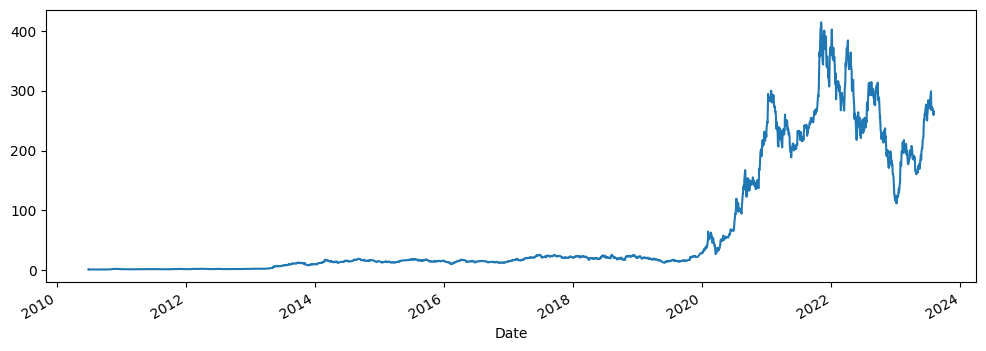

In [5]:
data_tesla.High.plot(figsize=(12,4))

In [6]:
data_tesla.loc['2020-01-01':'2021-09-01',:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2021-08-26,236.103333,238.466660,232.539993,233.720001,233.720001,39642900
2021-08-27,235.000000,238.333328,234.033340,237.306671,237.306671,41501400
2021-08-30,238.240005,243.666672,237.576660,243.636673,243.636673,55812600


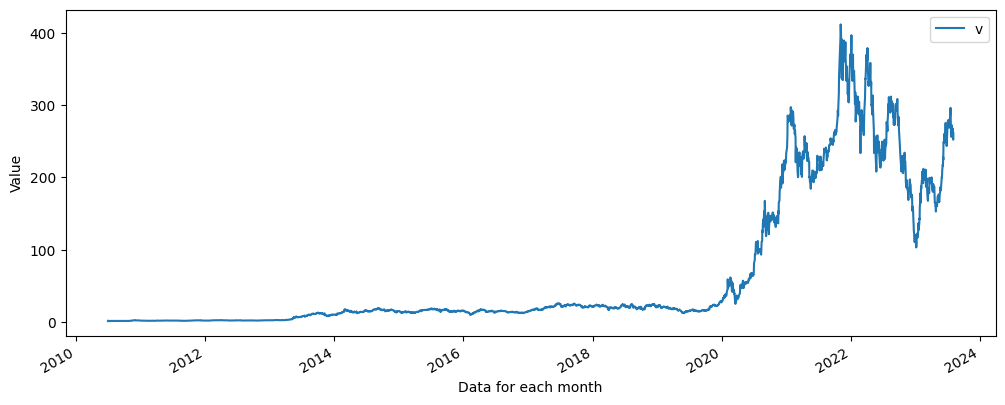

In [7]:
figure, axis = plt.subplots()
figure.autofmt_xdate()
figure.set_figwidth(12)
axis.plot(data_tesla.index, data_tesla.Open)
axis.set_xlabel('Data for each month')
axis.set_ylabel('Value')
axis.legend('val')

In [8]:
data_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3298 entries, 2010-06-29 to 2023-08-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3298 non-null   float64
 1   High       3298 non-null   float64
 2   Low        3298 non-null   float64
 3   Close      3298 non-null   float64
 4   Adj Close  3298 non-null   float64
 5   Volume     3298 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 309.4 KB


In [9]:
current = dt.datetime.now()
current

datetime.datetime(2023, 8, 6, 12, 15, 7, 515567)

In [10]:
current.resolution

datetime.timedelta(microseconds=1)

In [11]:
current.toordinal()

738738

In [12]:
data_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000
2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900


# Rule codes
1. 'A'/'Y' - 'Yearly'
2. 'D' - 'Daily'
3. 'M' - 'Monthly'
4. 'QS' - 'Quarterly Start Frequency'
5. 'BA' - 'Business Annual'
6. 'BQS' - 'Business Quarterly Start'

<Axes: xlabel='Date'>

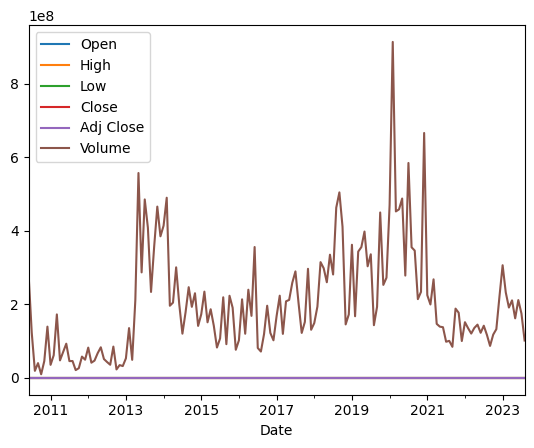

In [13]:

data_tesla.resample(rule='M').max().plot()

# Basic - Data smoothing using Rolling Window(Simple Moving Average)

In [129]:
data_tesla.Open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-25    235.676666
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
Name: Open, Length: 420, dtype: float64

In [128]:
data_tesla.Open.rolling(3).mean()

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06     29.010445
2020-01-07     29.830445
2020-01-08     30.568223
                 ...    
2021-08-25    233.683329
2021-08-26    236.224442
2021-08-27    235.593333
2021-08-30    236.447779
2021-08-31    239.191111
Name: Open, Length: 420, dtype: float64

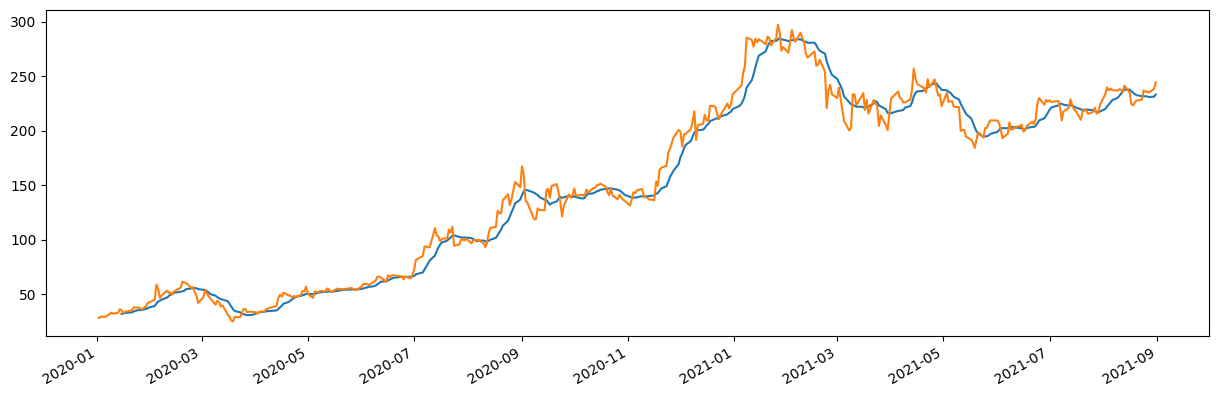

In [126]:
figure, axes = plt.subplots()
figure.autofmt_xdate()
figure.set_figwidth(15)
axes.plot(data_tesla.Open.rolling(10).mean())
axes.plot(data_tesla.Open)


# Types of Trends
### Upward Trend
### Downward Trend
### Stationary Data
### Cyclic Data

In [131]:
data_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000


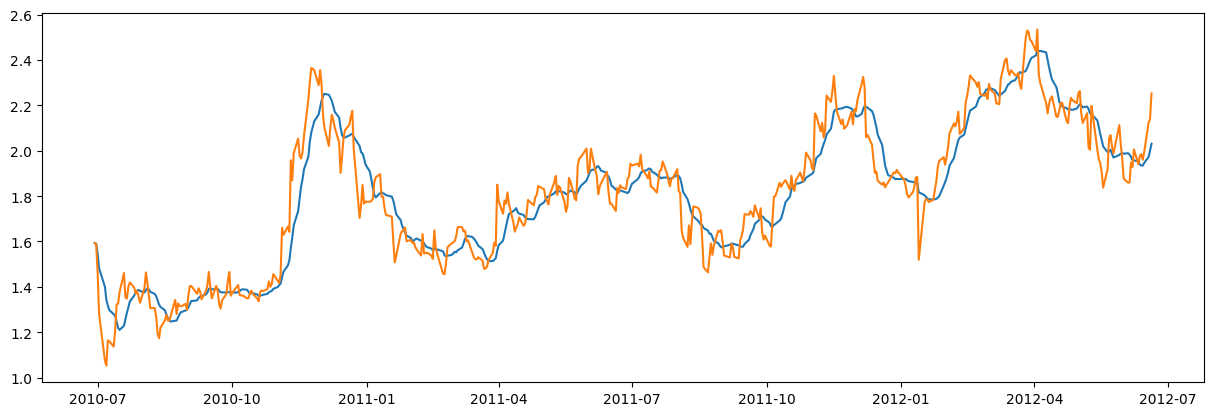

In [160]:
figure, axis = plt.subplots()
figure.set_figwidth(15)
axis.plot(data_tesla.Close[:500].rolling(10, min_periods=1).mean())
axis.plot(data_tesla.Close[:500])
# axis.set_xlim(2022, 2023)
# data_tesla.Close.rolling(10, min_periods=1).mean().plot()

# Cumulative Moving Average

<Axes: xlabel='Date'>

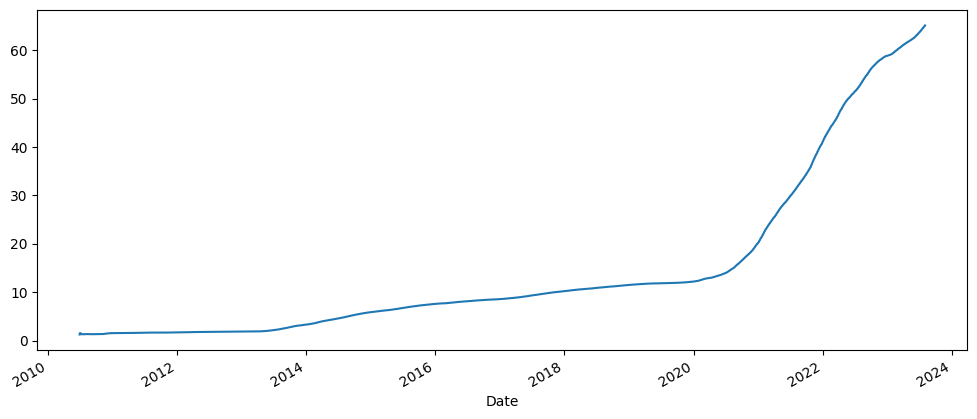

In [186]:
data_tesla.Open.expanding().mean().plot(figsize=(12,5))

In [ ]:
cmav = data_tesla.Open.expanding().mean()

In [178]:
cma = [data_tesla.Open[:i+1].mean() for i in range(len(data_tesla.Open))]

In [185]:
cmav == cma

Date
2010-06-29    True
2010-06-30    True
2010-07-01    True
2010-07-02    True
2010-07-06    True
              ... 
2023-07-28    True
2023-07-31    True
2023-08-01    True
2023-08-02    True
2023-08-03    True
Name: Open, Length: 3297, dtype: bool

# Exponential Weighted Moving Average/ Exponential Moving Average

In [203]:
def ema(data, alpha):
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append((1-alpha) * data[i] + alpha * ema[i-1])
    return ema

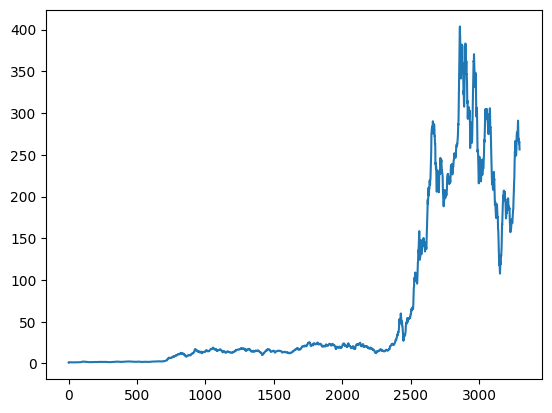

In [222]:
emwa = ema(data_tesla.Open, 0.5)
plt.plot(emwa)

<Axes: xlabel='Date'>

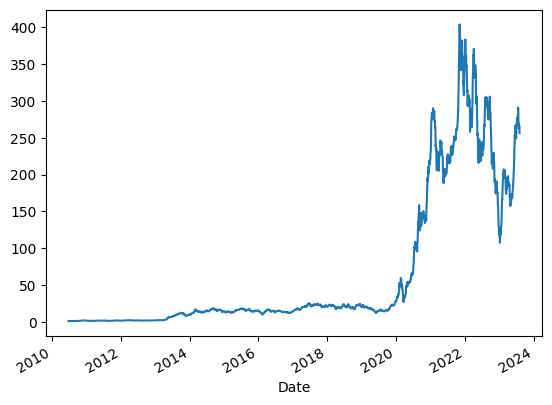

In [223]:
data_tesla['Open'].ewm(alpha=0.5).mean().plot()

# Seasonal Decompose to check for seasonality, trend and error components in the data

In [246]:
data_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000


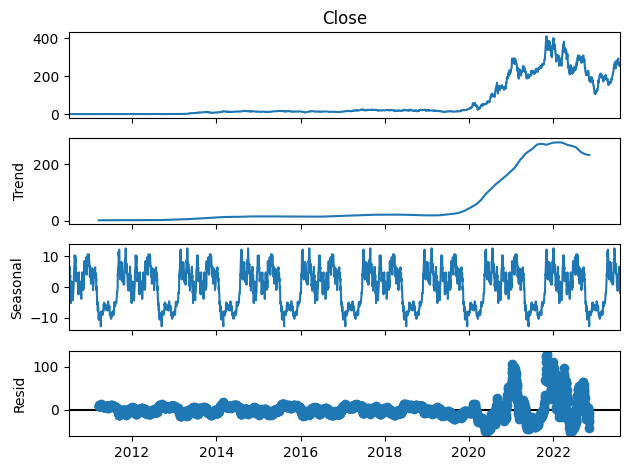

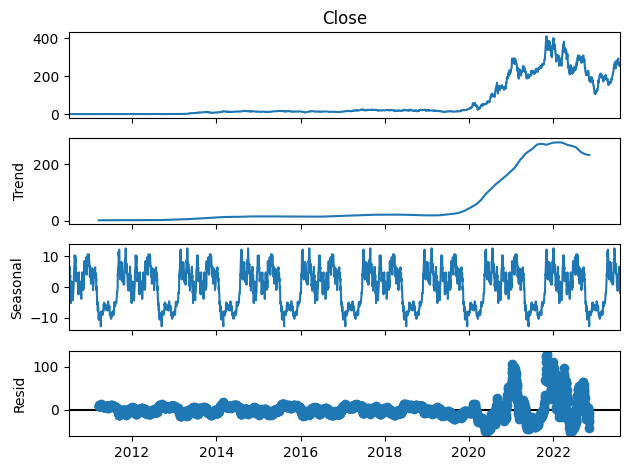

In [259]:
res = seasonal_decompose(data_tesla.Close, model="additive", period=365)
res.plot()

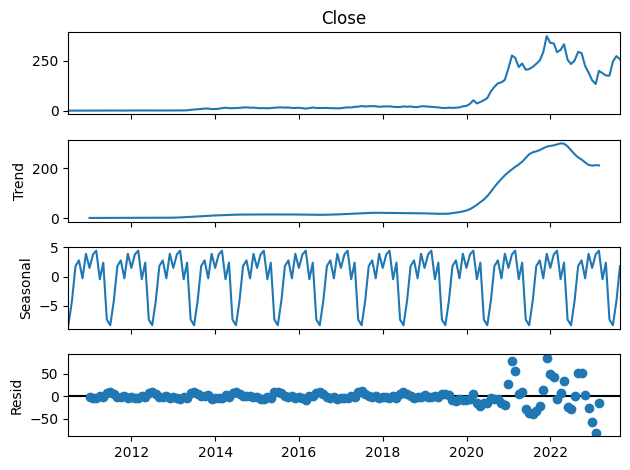

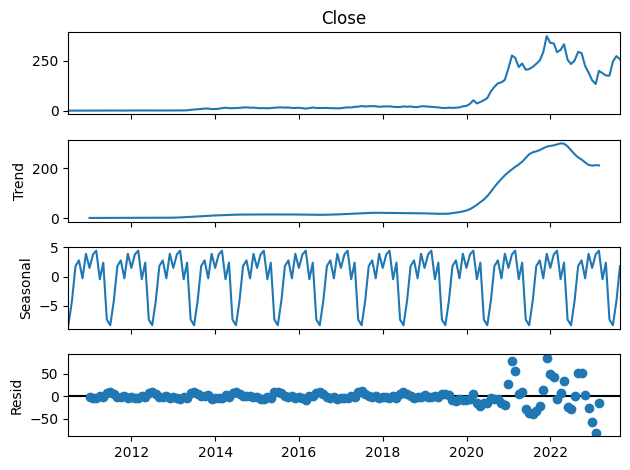

In [263]:
res_m = seasonal_decompose(data_tesla.resample(rule='M').mean().Close)
res_m.plot()

# Augmented Dickey-Fuller Test - ADF To check if the data is stationary or not

In [355]:
p_value = adfuller(data_tesla.Close.resample(rule='M').mean())[1]
p_value

0.9270318648050907

# ARIMA [Auto Regressive] + [Integrated] + [Moving Average]

### Auto Regressive - AR
- The AR component models the relationship between the current value of the time series and its past values.

- y(t) = c + φ₁ * y(t-1) + φ₂ * y(t-2) + ... + φₚ * y(t-p) + ε(t)

- y(t) is the current value of the time series.
- c is a constant term.
- φ₁, φ₂, ..., φₚ are the AR coefficients for the previous values.
- ε(t) is the white noise or error term at time t.

### Integrated - I
- The I component represents differencing the time series to make it stationary. Stationarity is a key assumption in ARIMA models. If the time series is not stationary (i.e., it has trends and seasonality), it needs to be differenced to remove these components.
- Stationary is achieved only if the mean, variance and autocorrelation of data are constant over time.
- Use Augmented Dickey-Fuller Test to check if the data is stationary or not.
- First-order differencing
    - Subtract the current value from previous value.
- Seasonal differencing
    - This involves subtracting each value from the corresponding value in the same season of the previous year or period.
- Higher-Order differencing
    - Apply first-order differencing and again apply first-order differencing to the differenced data.

### Moving Average - MA
- The MA component models the relationship between the current value of the time series and the past forecast errors

- y(t) = μ + ε(t) + θ₁ * ε(t-1) + θ₂ * ε(t-2) + ... + θ_q * ε(t-q)

- μ is the mean of the time series.
- θ₁, θ₂, ..., θ_q are the MA coefficients for the past forecast errors.
- ε(t) is the white noise or error term at time t.

### Partial Auto-Correlation Function - PACF plot to get the order of P for AR(P)

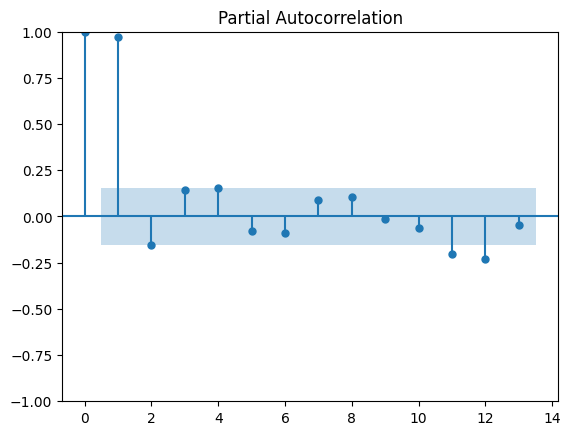

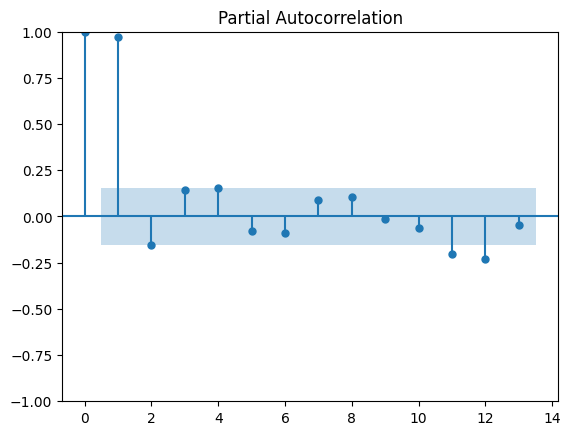

In [356]:
# figure, axis = plt.subplots(2)
plot_pacf(data_tesla.resample(rule='M').mean().Close, lags=13)
# plot_acf(data_tesla.Close.diff().dropna(), ax=axis[1])

### Auto-Correlation Function - ACF to find the order of q, MA(q)

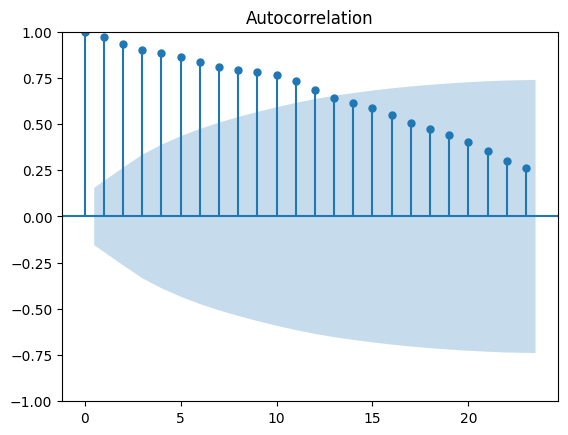

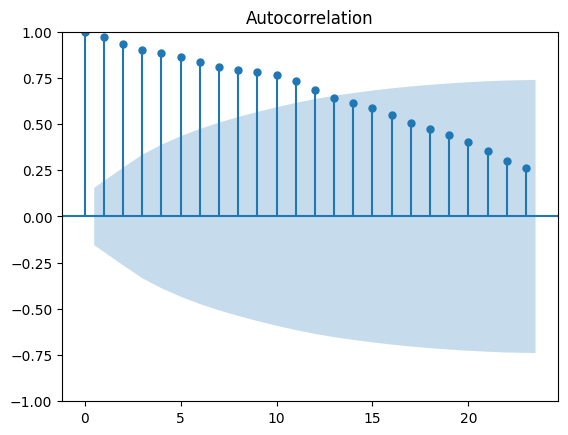

In [369]:
plot_acf(data_tesla.resample(rule='M').mean().Close)

### Akaike Information Criterion - AIC to get the best model, similar to hyper-parameter tuning in Regession/CLassification models

In [319]:
error = []
values = []

p=range(0,8)
q=range(0,8)
d=range(0,2)

for i in list(product(p,d,q)):
    model = ARIMA(data_tesla.Close.resample(rule='M').mean()[:145], order=i).fit()
    pred = model.predict(start='2022-07-31', end='2023-08-31')
    values.append(i)
    error.append(np.sqrt(mse(data_tesla.Close.resample(rule='M').mean()[145:], pred)))


/Users/nkyatham/Desktop/Machine Learning/ml_venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/nkyatham/Desktop/Machine Learning/ml_venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/nkyatham/Desktop/Machine Learning/ml_venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/nkyatham/Desktop/Machine Learning/ml_venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as sta

In [333]:
model = ARIMA(data_tesla.Close.resample(rule='M').mean()[:145], order = values[np.where(error == min(error))[0][0]]).fit()

/Users/nkyatham/Desktop/Machine Learning/ml_venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nkyatham/Desktop/Machine Learning/ml_venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/nkyatham/Desktop/Machine Learning/ml_venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [336]:
pred = model.predict(start='2022-07-31', end='2023-08-31')
pred

2022-07-31    208.293837
2022-08-31    218.477184
2022-09-30    237.749949
2022-10-31    216.522487
2022-11-30    199.331007
2022-12-31    187.500674
2023-01-31    207.431352
2023-02-28    223.790235
2023-03-31    214.649856
2023-04-30    194.668987
2023-05-31    186.853607
2023-06-30    204.959812
2023-07-31    221.086484
2023-08-31    214.923532
Freq: M, Name: predicted_mean, dtype: float64

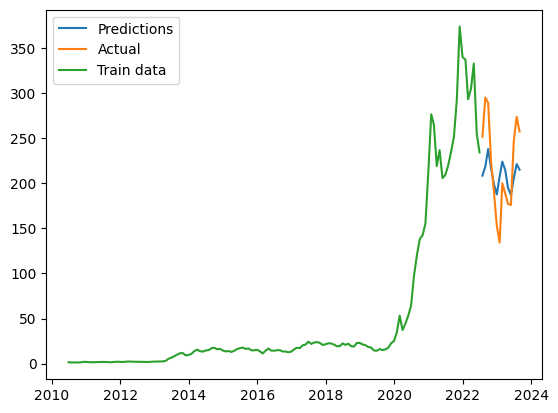

In [347]:
figure, axis = plt.subplots()
axis.plot(pred, label='Predictions')
axis.plot(data_tesla.Close.resample(rule='M').mean()[145:], label='Actual')
axis.plot(data_tesla.Close.resample(rule='M').mean()[:145], label='Train data')
axis.legend()
plt.show()

In [18]:
smodel = SARIMAX(data_tesla.Close.resample(rule='M').mean()[:145], order=(5,1,3), seasonal_order=(1,0,1,12)).fit()
spred = smodel.predict(start='2022-07-31', end='2023-08-31')

/Users/nkyatham/Desktop/Machine Learning/ml_venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nkyatham/Desktop/Machine Learning/ml_venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12081D+00    |proj g|=  2.80152D-01

At iterate    5    f=  4.02686D+00    |proj g|=  7.05159D-02

At iterate   10    f=  3.97083D+00    |proj g|=  3.46176D-02

At iterate   15    f=  3.96348D+00    |proj g|=  2.17756D-02

At iterate   20    f=  3.94509D+00    |proj g|=  7.81112D-02

At iterate   25    f=  3.93627D+00    |proj g|=  1.29654D-02

At iterate   30    f=  3.93086D+00    |proj g|=  1.22591D-02

At iterate   35    f=  3.92969D+00    |proj g|=  4.21484D-03

At iterate   40    f=  3.92952D+00    |proj g|=  1.25904D-03

At iterate   45    f=  3.92951D+00    |proj g|=  5.49963D-04

At iterate   50    f=  3.92950D+00    |proj g|=  1.60108D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/nkyatham/Desktop/Machine Learning/ml_venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


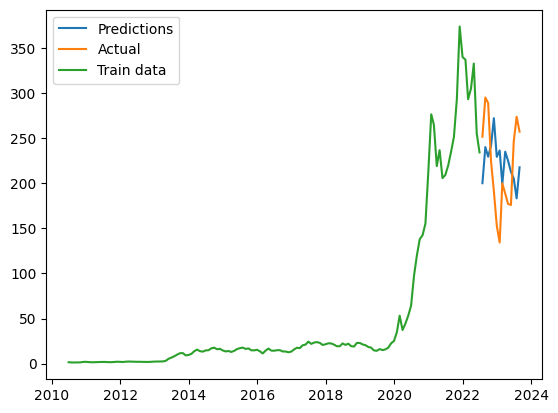

In [19]:
figure, axis = plt.subplots()
axis.plot(spred, label='Predictions')
axis.plot(data_tesla.Close.resample(rule='M').mean()[145:], label='Actual')
axis.plot(data_tesla.Close.resample(rule='M').mean()[:145], label='Train data')
axis.legend()
plt.show()

# Univariate and Multivariate time-series analysis
#### Univariate time-series - In an univariate time series, there is only one variable or data series that is recorded at regular time intervals. This single variable captures the behavior or pattern of interest over time. Univariate time series analysis involves forecasting the future values of this single variable based on its past observations. Examples of univariate time series include stock prices, temperature readings, and daily sales of a single product.
#### Multivariate time-series - In a multivariate time series, there are multiple variables or data series that are recorded simultaneously at regular time intervals. These variables can interact with each other and exhibit interdependencies. Multivariate time series analysis involves modeling and forecasting the future values of multiple variables based on their past observations and potential relationships. Examples of multivariate time series include macroeconomic indicators such as GDP, inflation rate, and unemployment rate, where the variables can influence each other.
- When dealing with multivariate time series, additional techniques like vector autoregression (VAR), cointegration analysis, and machine learning methods can be used to capture relationships and dependencies among the variables.